<a href="https://colab.research.google.com/github/spros1/Methods-and-Algorithms_Work_Semester_21-22/blob/main/Meteorological_Measurements_AthensCenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecast models for meteorological measurements from Center of Athens

###We are going to work with two datasets :
|Train dataset period |Test Dataset|
----------------------|------------|
|   2009 - 2016       | 2017       |

<br>

###Both datasets fields stracture it is the same : <br>

1. Month of the Year (1, 2, . . . , 12) as month
2. Maximum Temperature Value as maxtemp
3. Minimum Temperature Value as mintemp
4. Degree heating days       as heatdegree
5. Degree of cooling days    as cooldegree
6. Rainfall Height           as rainheight
7. Average Wind Speed        as avgwindspeed
8. Max Wind Speed            as mazwindspeed




In [2]:
## Upload files - Run the same cell twice to upload both athens_09_16 and athens_2017 files
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Saving athens_2017.dat to athens_2017.dat


In [580]:
## put data of both files into dataframes
df_09_16 = pd.read_csv("athens_09-16.dat", header=None, sep = ' ', names=["month", "maxtemp", "mintemp", "heatdegree","cooldegree","rainheight","avgwindspeed","mazwindspeed"])
df_17    = pd.read_csv("athens_2017.dat" , header=None, sep = ' ', names=["month", "maxtemp", "mintemp", "heatdegree","cooldegree","rainheight","avgwindspeed","mazwindspeed"])

# Check values for both files
First for athens_09-16.dat

In [581]:
## imports for data investigations
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [583]:
# total rows and columns
df_09_16.shape

(2442, 8)

In [584]:
## check values
df_09_16.head()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed
0,1.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
1,10.0,25.3,16.6,0.3,2.7,0.0,1.4,16.1
2,12.0,15.8,4.2,8.3,0.0,3.4,1.6,24.1
3,12.0,11.2,5.8,9.0,0.0,0.0,7.7,38.6
4,5.0,23.6,18.2,0.0,1.7,0.0,8.4,37.0


In [585]:
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   float64
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
dtypes: float64(8)
memory usage: 152.8 KB


In [586]:
# ckeck statistics
df_09_16.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,2442.0,6.594595,3.428837,1.0,4.0,7.0,10.000,12.0
maxtemp,2442.0,23.439476,7.660457,5.0,17.4,23.0,30.200,39.8
mintemp,2442.0,15.893857,6.809994,0.4,10.3,15.4,22.000,30.3
heatdegree,2442.0,2.580262,3.402915,0.0,0.0,0.7,4.600,15.3
cooldegree,2442.0,3.809541,4.472352,0.0,0.0,1.4,7.775,16.4
rainheight,2442.0,1.317035,5.194972,0.0,0.0,0.0,0.000,97.0
avgwindspeed,2442.0,4.694513,3.230696,0.3,2.4,3.7,6.300,17.7
mazwindspeed,2442.0,29.304709,9.809560,8.0,22.5,29.0,35.400,70.8


In [587]:
# search for missing values -- no missing values
df_09_16.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0])

Lets check for outliers for specific field of rainheight (which is the requested result in excercice a).

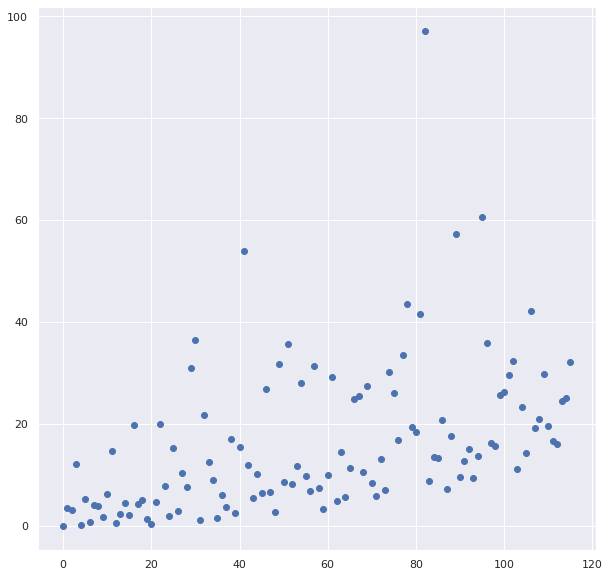

In [588]:
# On top we can see only a few of outliers, no action for now
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(len(df_09_16["rainheight"].unique())), df_09_16["rainheight"].unique())

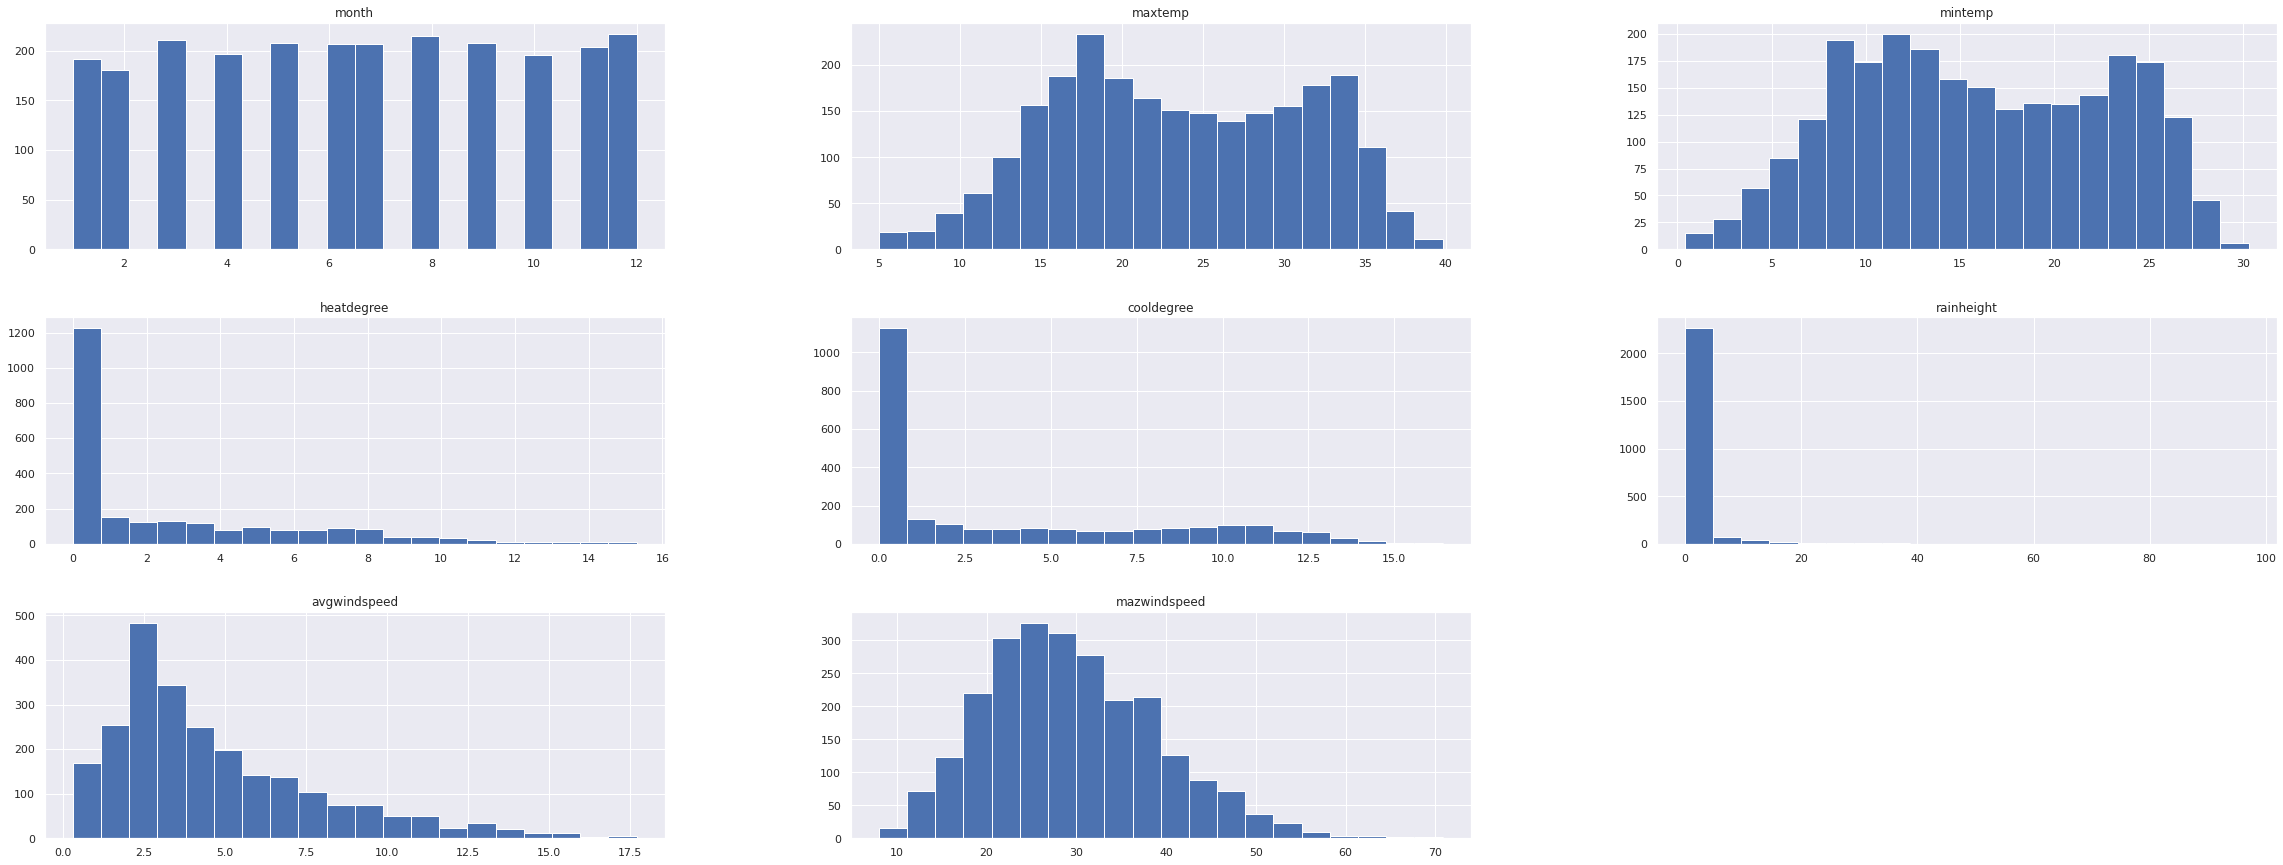

In [589]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
df_09_16.hist(figsize = (40,15), bins = 20)
plt.show()

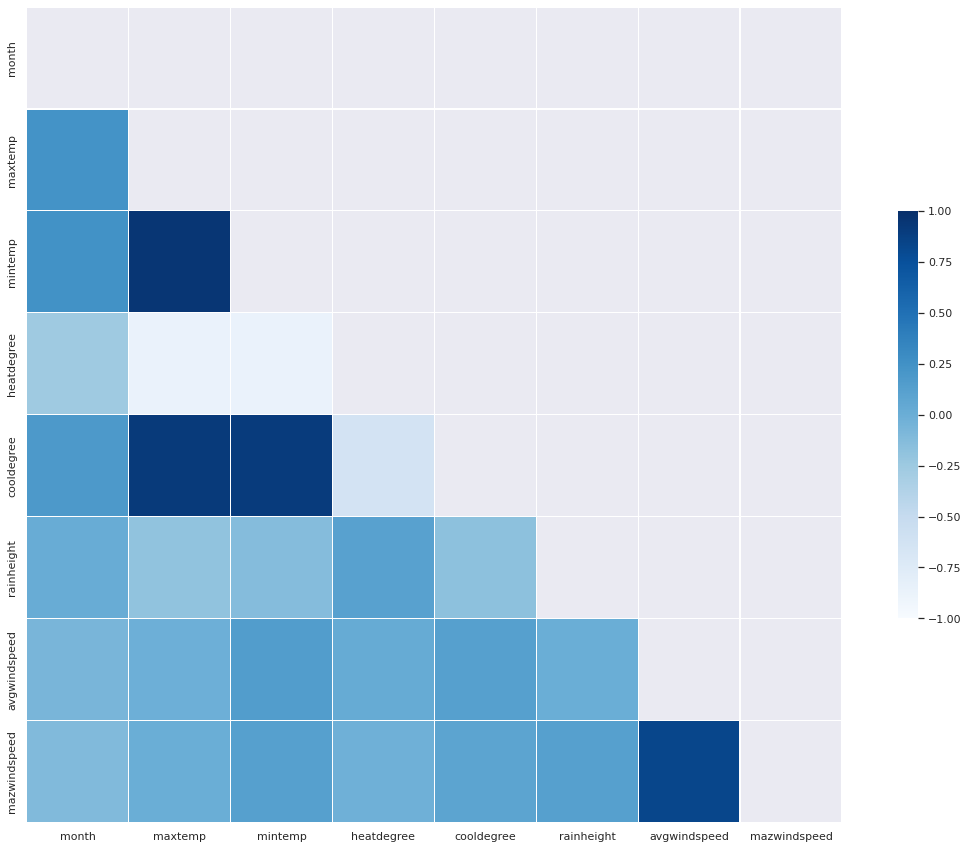

In [590]:
## heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_09_16.corr(), cmap="Blues",mask=np.triu(np.ones_like(df_09_16.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

To conclude for first dataset :

* There are no null values to impute
* All the values are numeric
* No duplicate values
* Values of column month are float and should be changed to integer
* Exists some outliers but for now we are going to continue with no actions

In [591]:
# change month to integer
df_09_16['month'] = df_09_16['month'].astype(int)
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   int64  
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 152.8 KB


Check values for athens_2017.dat

In [592]:
# total rows and columns
df_17.shape

(365, 8)

In [593]:
## check values
df_17.head()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed
0,1.0,10.0,4.0,11.6,0.0,0.0,1.8,16.1
1,1.0,12.8,1.9,10.9,0.0,0.0,0.6,14.5
2,1.0,15.3,4.6,8.7,0.0,0.0,1.1,24.1
3,1.0,15.5,5.7,7.3,0.0,0.2,1.8,24.1
4,1.0,17.1,7.7,5.3,0.0,0.0,4.2,43.5


In [594]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         365 non-null    float64
 1   maxtemp       365 non-null    float64
 2   mintemp       365 non-null    float64
 3   heatdegree    365 non-null    float64
 4   cooldegree    365 non-null    float64
 5   rainheight    365 non-null    float64
 6   avgwindspeed  365 non-null    float64
 7   mazwindspeed  365 non-null    float64
dtypes: float64(8)
memory usage: 22.9 KB


In [595]:
# ckeck statistics
df_17.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,365.0,6.526027,3.452584,1.0,4.0,7.0,10.0,12.0
maxtemp,365.0,23.413425,7.943873,3.1,17.6,22.6,30.1,41.3
mintemp,365.0,15.295068,7.081568,-1.1,9.8,14.4,20.9,30.0
heatdegree,365.0,2.799452,3.670300,0.0,0.0,1.0,4.4,17.5
cooldegree,365.0,3.717534,4.622629,0.0,0.0,1.1,6.9,16.9
rainheight,365.0,1.293151,5.336200,0.0,0.0,0.0,0.0,54.0
avgwindspeed,365.0,4.267945,3.069504,0.5,2.1,3.2,6.0,16.1
mazwindspeed,365.0,28.154795,9.237035,9.7,20.9,27.4,35.4,51.5


In [596]:
# search for missing values -- no missing values
df_17.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0])

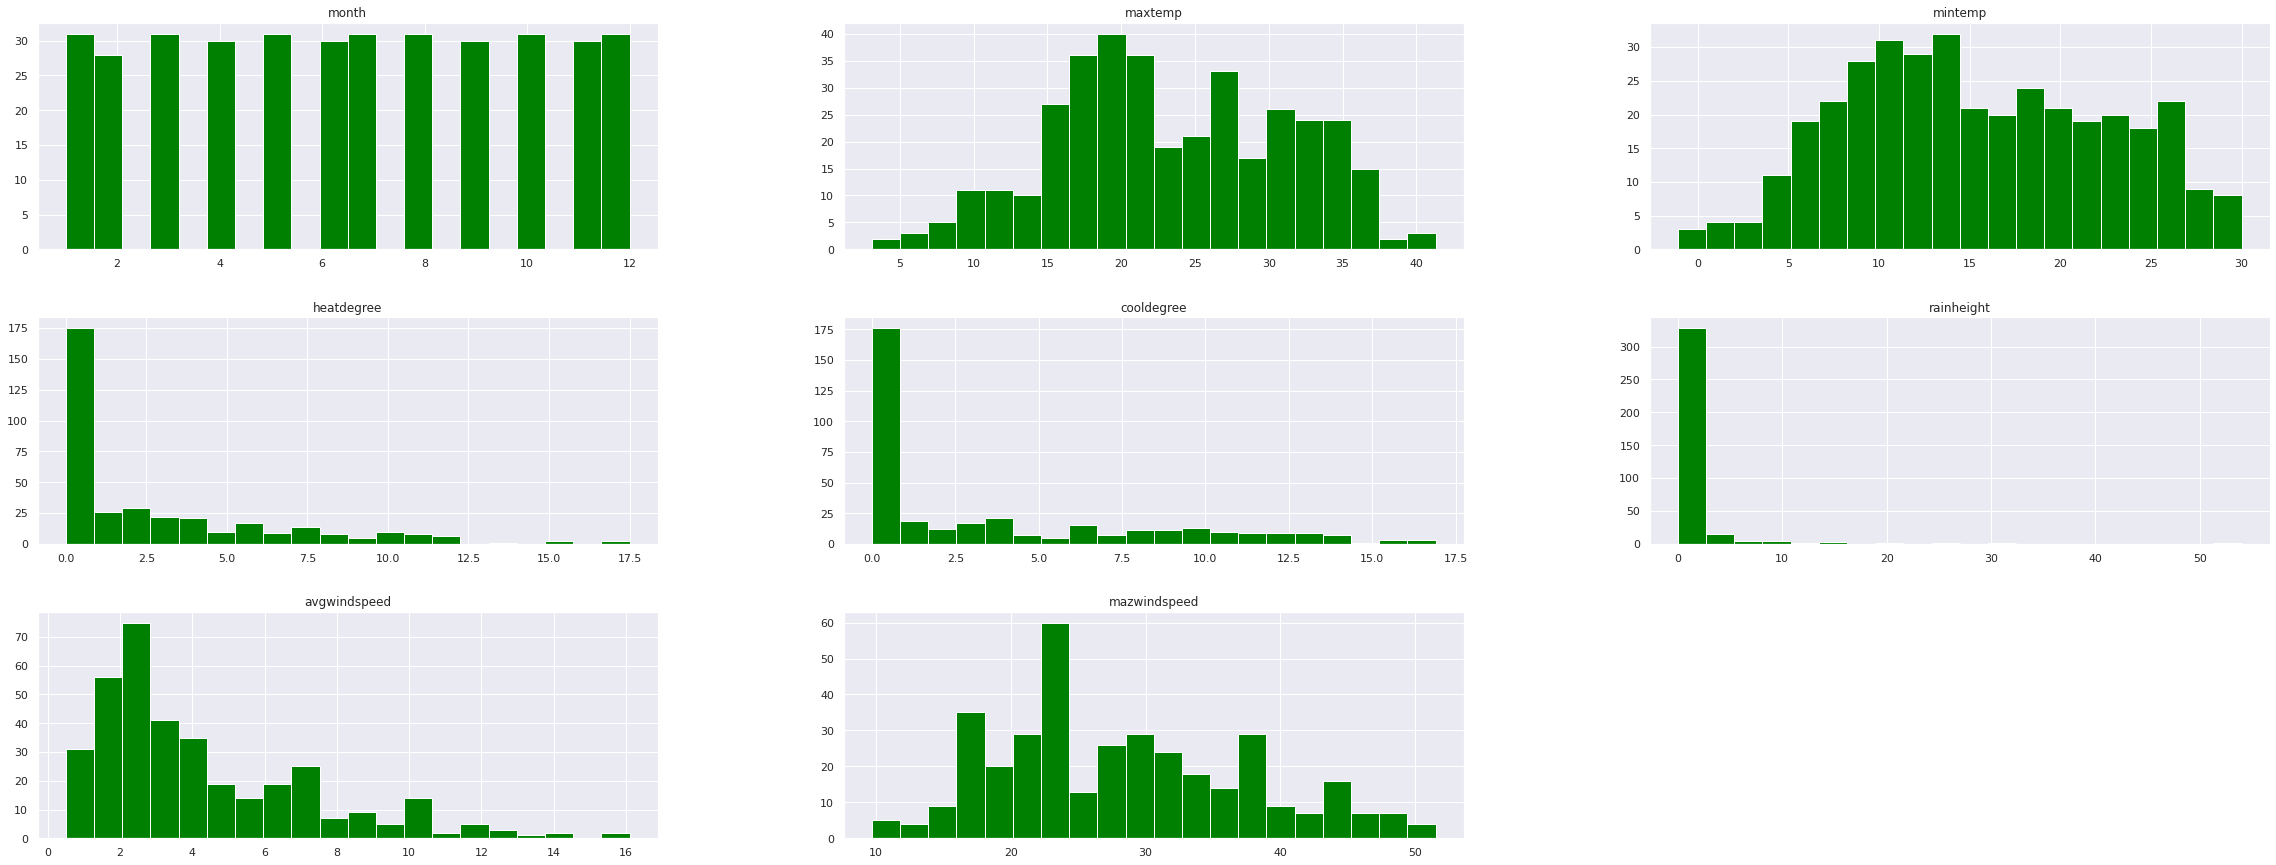

In [597]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
df_17.hist(color = "green",figsize = (40,15), bins = 20)
plt.show()

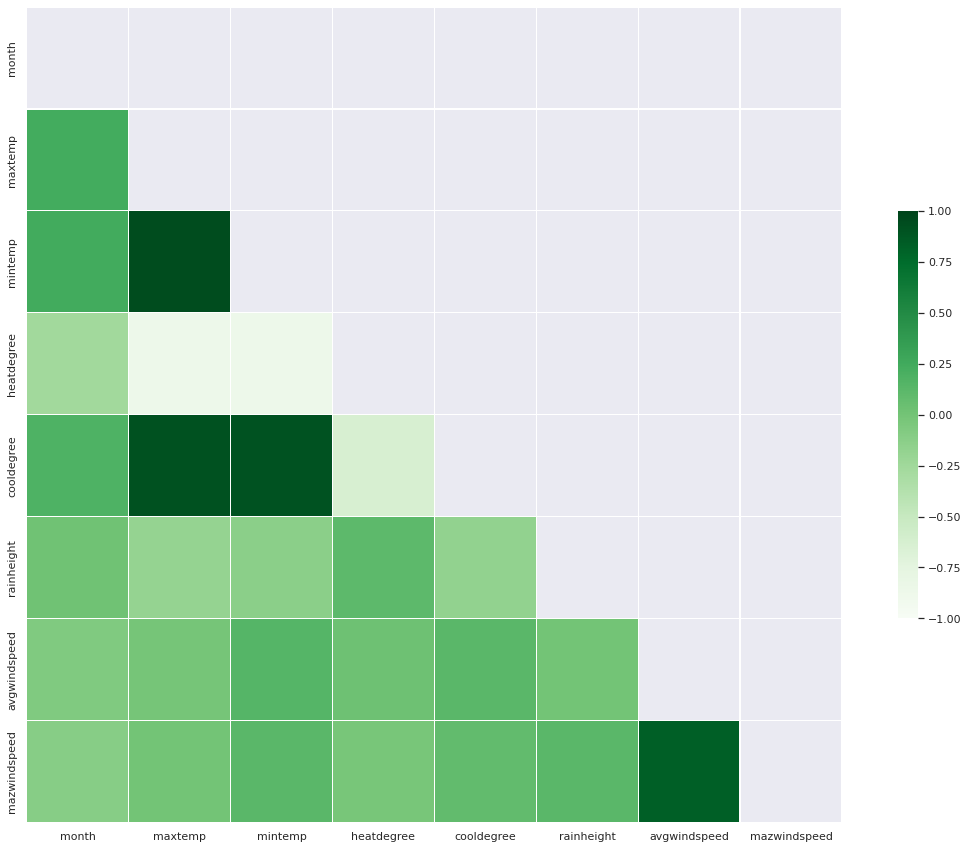

In [598]:
## heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_09_16.corr(), cmap="Greens",mask=np.triu(np.ones_like(df_09_16.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

To conclude for second dataset :

* There are no null values to impute
* All the values are numeric
* No duplicate values
* Values of column month are float and should be changed to integer

In [599]:
# change month to integer
df_17['month'] = df_17['month'].astype(int)
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         365 non-null    int64  
 1   maxtemp       365 non-null    float64
 2   mintemp       365 non-null    float64
 3   heatdegree    365 non-null    float64
 4   cooldegree    365 non-null    float64
 5   rainheight    365 non-null    float64
 6   avgwindspeed  365 non-null    float64
 7   mazwindspeed  365 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 22.9 KB


------------------------------------------------------------
# Requested exercise -> 1a
Creation of models in order to predict rain heigth (without using month feature)<br>
We will use RandomForestRegressor and XGBRegressor. <br>
The results are measured by Mean Absolute Error(MSE).<br><br>
MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

In [600]:
# import for models and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

from time                    import time
import xgboost as xgb
from xgboost                 import XGBClassifier
from xgboost                 import XGBRegressor
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestRegressor
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from imblearn.pipeline       import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Split to tran and test 80 - 20 %

In [601]:
 # Split dataset to 80% - 20%
x = df_09_16.drop(columns=['month','rainheight'])
y = df_09_16['rainheight']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1953, 6), (1953,), (489, 6), (489,))

###Create functions for the models, for the visualization and the comparison of results
We will also standard scaler in order to get better results as all the features are float type


In [602]:
# function to run method
def model_execution(model, model_name):
  
  pipe = Pipeline(steps= [ ('standardscaler', StandardScaler()),
                           (model_name, model)])
  start = time()
  fitted_model = pipe.fit(X_train, y_train)
  end = time()
  runtime = round((end - start),4)
  print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
 
  return fitted_model, runtime

In [603]:
# function to fit the model
def model_prediction(fitted_model, x_feat):
  
  pred = fitted_model.predict(x_feat)
  return pred

In [604]:
# function for the scores 
def model_evaluation_regressor (y_true, y_pred, model_name, train_test):

  df_score=pd.DataFrame({ 
                   'model_name'  : [model_name, model_name]
                  , 'type'       : [train_test, train_test]
                  ,'metric_name' : ['Mean_Squared_Error', 'R2 Score'] 
                  , 'metric'     : [
                                    round(mean_squared_error(y_true, y_pred), 4)
                                  , round(r2_score(y_true, y_pred) , 4)
                                  ]
  })
  display(df_score)
  return df_score

#### Functions for clasiffication

In [605]:
## We are going to create a function using LabelBinarizer() in order to evaluate the AUC ROC score for multi-class problem:
def multiclass_roc_auc_score(y_true, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_true)
  y_true = lb.transform(y_true)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_true, y_pred, average=average)

In [606]:
## Same for precision score
def multiclass_precision_score(y_true, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_true)
  y_true = lb.transform(y_true)
  y_pred = lb.transform(y_pred)
  return precision_score(y_true, y_pred, average=average)

In [607]:
# function for the scores 
def model_evaluation_classification (y_true, y_pred, model_name, train_test):

  df_score=pd.DataFrame({ 
                   'model_name' : [
                                     model_name
                                   , model_name
                                   , model_name
                                   , model_name
                                   , model_name
                                  ],
                   'type'       : [
                                     train_test
                                   , train_test
                                   , train_test
                                   , train_test
                                   , train_test
                                  ],
                   'metric_name': [
                                    'Accuracy_Score' 
                                    ,'F1_Score'      
                                    ,'Recall'        
                                    ,'Precision'      
                                    ,'Roc_Auc_Score'
                                  ],
                   'metric'     : [
                                    round(accuracy_score(y_true, y_pred                  )   , 4)
                                   ,round(f1_score(y_true, y_pred        ,average='macro')   , 4)
                                   ,round(recall_score(y_true, y_pred    ,average='macro')   , 4)
                                   ,round(multiclass_precision_score(y_true, y_pred      )   , 4)
                                   ,round(multiclass_roc_auc_score(y_true, y_pred        )   , 4)
                                  ]
  })
  display(df_score)
  return df_score

In [608]:
def conf_matrix_classification (y_true, y_pred, incmap):

  # show values
  matrix = confusion_matrix(y_true,  y_pred, labels=[0,1,2,3], normalize="true")
  print('Confusion matrix : \n',matrix)

  # plot
  sns.set()
  ax = sns.heatmap(matrix, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap= incmap)
  plt.show()

#### Create functions for model classification scores comparisons

In [609]:
# for model comparisons
def model_plot_scores(df, metric, axis):

  grouped_df = model_total[model_total['metric_name'] == metric]

  sns.set_style("darkgrid")
  g = sns.barplot( data=grouped_df, hue='type', x='model_name', y='metric', ax=axis )
  g.set_ylabel(metric)
  g.set_title(f'{metric}')
  g.legend(loc=(0.7,1.15))

  return

### Implementation of models

###Random Forest

In [610]:
#  Random Forest model run
RFC_model, RFC_runtime = model_execution(RandomForestRegressor(), 'RandomForest')
train_pred_RFC = model_prediction(RFC_model, X_train  )
test_pred_RFC  = model_prediction(RFC_model, X_test)

# Random Forest Evaluation
print("\n")
RFC_train = model_evaluation_regressor(y_train, train_pred_RFC, 'RFC', 'Train')
print("\n")
RFC_test = model_evaluation_regressor(y_test, test_pred_RFC,'RFC', 'Test')


RandomForest took 0.5835 seconds or 0.0097 minutes to run.




,model_name,type,metric_name,metric
0,RFC,Train,Mean_Squared_Error,2.9455
1,RFC,Train,R2 Score,0.8672


,model_name,type,metric_name,metric
0,RFC,Test,Mean_Squared_Error,41.6199
1,RFC,Test,R2 Score,0.0959


###LinearRegression

In [611]:
# LinearRegression run 
LRG_model, LRG_runtime = model_execution(LinearRegression(), 'LRGClassifier')
train_pred_LRG = model_prediction(LRG_model, X_train)
test_pred_LRG  = model_prediction(LRG_model, X_test)

# LinearRegression Evaluation
LRG_train = model_evaluation_regressor(y_train, train_pred_LRG, 'LRG', 'Train')
print("\n")
LRG_test = model_evaluation_regressor(y_test, test_pred_LRG,'LRG', 'Test')

LRGClassifier took 0.0138 seconds or 0.0002 minutes to run.


,model_name,type,metric_name,metric
0,LRG,Train,Mean_Squared_Error,19.3386
1,LRG,Train,R2 Score,0.1281


,model_name,type,metric_name,metric
0,LRG,Test,Mean_Squared_Error,41.2477
1,LRG,Test,R2 Score,0.1040


####Results on test set from 2009-2016
As we can see from the results Random Forest Regressor is better from XGB Regressor , but both not so good at test set as the Mean Square Error is big enough (> 25.5 )

------------------------------------------------
###To continue with, lets fit to model as test the data from athens_2017.*dat*

In [612]:
test_17      = df_17.drop(columns=['month','rainheight'])
test_17_rain = df_17['rainheight']

###Random Forest

In [613]:
#  Random Forest model run
test_17_pred_RFC  = model_prediction(RFC_model, test_17)

# Random Forest Evaluation
print("\n")
RFC_test_2017 = model_evaluation_regressor(test_17_rain, test_17_pred_RFC, 'RFC_2017', 'Test')

,model_name,type,metric_name,metric
0,RFC_2017,Test,Mean_Squared_Error,29.1942
1,RFC_2017,Test,R2 Score,-0.0281


###LinearRegression

In [614]:
# LinearRegression run 
test_17_pred_LRG  = model_prediction(LRG_model, test_17)

# LinearRegression Evaluation
print("\n")
LRG_test_2017 = model_evaluation_regressor(test_17_rain, test_17_pred_LRG, 'LRG_2017', 'Test')

,model_name,type,metric_name,metric
0,LRG_2017,Test,Mean_Squared_Error,25.8101
1,LRG_2017,Test,R2 Score,0.0911


####Results on test set from 2017
As we can see from the results linearRegression is better from Random Forest Regressor. <br>
Both have similar Mean Square Error which is closest to zero than test set of 2009-2016 , show it works better on this test set. <br> 
But R2 Score for both ( and especialy for Random Forest which is negative) tell us that it is bad fit or has extreme bad prediction, so the best is to not take it under consideration. 

-------------------------------------------------------------------
#Requested exercise -> 1b
Creation of models in order to predict the season of year
(without using month feature)

We will use RandomForestRegressor and XGBRegressor.
The results are measured by Mean Absolute Error(MSE).

MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

####First we are going to generate a new feature to both datasets that will be the season with values : <br>
* 0 -> For Winter
* 1 -> For Sping
* 2 -> For Summer
* 3 -> For Fall


In [476]:
# for test purposes delete season column if something went wrong
#df_17.drop(df_17.columns[[7]],axis=1,inplace=True)
#df_09_16.drop(df_09_16.columns[[8]],axis=1,inplace=True)

In [615]:
## first we are going to generate a new feature to dataset of 2009-2016
season = []
for i in range(0,df_09_16.shape[0]):
    if   df_09_16.iloc[i,0] in [12,1,2]:
         season.append(0)
    elif df_09_16.iloc[i,0] in [3,4,5]:
         season.append(1)
    elif df_09_16.iloc[i,0] in [6,7,8]:
         season.append(2)
    elif df_09_16.iloc[i,0] in [9,10,11]:
         season.append(3)   

df_09_16 = df_09_16.join(pd.DataFrame({'season': season})) 

In [616]:
# same for dataset of 2017
season = []
for i in range(0,df_17.shape[0]):
    if   df_17.iloc[i,0] in [12,1,2]:
         season.append(0)
    elif df_17.iloc[i,0] in [3,4,5]:
         season.append(1)
    elif df_17.iloc[i,0] in [6,7,8]:
         season.append(2)
    elif df_17.iloc[i,0] in [9,10,11]:
         season.append(3)   

df_17 = df_17.join(pd.DataFrame({'season': season})) 

In [617]:
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   int64  
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
 8   season        2442 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 171.8 KB


In [618]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         365 non-null    int64  
 1   maxtemp       365 non-null    float64
 2   mintemp       365 non-null    float64
 3   heatdegree    365 non-null    float64
 4   cooldegree    365 non-null    float64
 5   rainheight    365 non-null    float64
 6   avgwindspeed  365 non-null    float64
 7   mazwindspeed  365 non-null    float64
 8   season        365 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 25.8 KB


In [619]:
df_09_16.head()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed,season
0,1,16.5,11.3,4.4,0.0,0.0,2.4,32.2,0
1,10,25.3,16.6,0.3,2.7,0.0,1.4,16.1,3
2,12,15.8,4.2,8.3,0.0,3.4,1.6,24.1,0
3,12,11.2,5.8,9.0,0.0,0.0,7.7,38.6,0
4,5,23.6,18.2,0.0,1.7,0.0,8.4,37.0,1


###Split to tran and test 80 - 20 %

In [620]:
# Split dataset to 80% - 20%
x = df_09_16.drop(columns=['month','season'])
y = df_09_16['season']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1953, 7), (1953,), (489, 7), (489,))

###Support Vector Machine

SVC took 0.1283 seconds or 0.0021 minutes to run.




,model_name,type,metric_name,metric
0,SVC,Train,Accuracy_Score,0.7158
1,SVC,Train,F1_Score,0.7101
2,SVC,Train,Recall,0.7158
3,SVC,Train,Precision,0.7107
4,SVC,Train,Roc_Auc_Score,0.8105




Confusion matrix : 
 [[0.82212581 0.14967462 0.         0.02819957]
 [0.1752988  0.64541833 0.0438247  0.13545817]
 [0.         0.02371542 0.88339921 0.09288538]
 [0.0785124  0.23553719 0.17355372 0.51239669]]


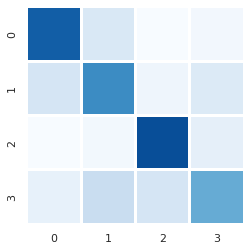

,model_name,type,metric_name,metric
0,SVC,Test,Accuracy_Score,0.6933
1,SVC,Test,F1_Score,0.6782
2,SVC,Test,Recall,0.6901
3,SVC,Test,Precision,0.6833
4,SVC,Test,Roc_Auc_Score,0.7940




Confusion matrix : 
 [[0.8671875  0.109375   0.         0.0234375 ]
 [0.21929825 0.5877193  0.06140351 0.13157895]
 [0.         0.03252033 0.88617886 0.08130081]
 [0.13709677 0.26612903 0.17741935 0.41935484]]


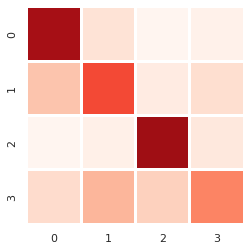

In [621]:
#Support Vector run
SVC_model, SVC_runtime = model_execution(SVC(), 'SVC')
train_pred_SVC = model_prediction(SVC_model, X_train)
test_pred_SVC  = model_prediction(SVC_model, X_test)

#Support Vector Evaluation
print("\n")
SVC_train = model_evaluation_classification(y_train, train_pred_SVC,'SVC', 'Train')
print("\n")
conf_matrix_classification(y_train, train_pred_SVC,'Blues')
print("\n")
SVC_test = model_evaluation_classification(y_test, test_pred_SVC, 'SVC', 'Test')
print("\n")
conf_matrix_classification(y_test, test_pred_SVC,'Reds')

###Logistic Regression

Logistic_Regression took 0.1213 seconds or 0.002 minutes to run.




,model_name,type,metric_name,metric
0,LG,Train,Accuracy_Score,0.6677
1,LG,Train,F1_Score,0.6608
2,LG,Train,Recall,0.6685
3,LG,Train,Precision,0.6568
4,LG,Train,Roc_Auc_Score,0.7789




Confusion matrix : 
 [[0.81127983 0.16052061 0.         0.02819957]
 [0.21513944 0.50199203 0.03784861 0.24501992]
 [0.         0.01976285 0.88142292 0.09881423]
 [0.07438017 0.26859504 0.17768595 0.47933884]]


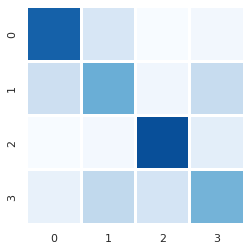

,model_name,type,metric_name,metric
0,LG,Test,Accuracy_Score,0.6646
1,LG,Test,F1_Score,0.6489
2,LG,Test,Recall,0.6602
3,LG,Test,Precision,0.6464
4,LG,Test,Roc_Auc_Score,0.7743




Confusion matrix : 
 [[0.8359375  0.1171875  0.         0.046875  ]
 [0.22807018 0.49122807 0.05263158 0.22807018]
 [0.         0.01626016 0.89430894 0.08943089]
 [0.13709677 0.25806452 0.18548387 0.41935484]]


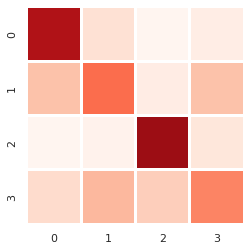

In [622]:
# Logistic Regression run 
lr_model, lr_runtime = model_execution(LogisticRegression(max_iter=400), 'Logistic_Regression')
train_pred_lr = model_prediction(lr_model, X_train)
test_pred_lr  = model_prediction(lr_model, X_test)

# Logistic Regression Evaluation
print("\n")
LG_train = model_evaluation_classification(y_train, train_pred_lr, 'LG', 'Train')
print("\n")
conf_matrix_classification(y_train, train_pred_lr,'Blues')

print("\n")
LG_test = model_evaluation_classification(y_test, test_pred_lr, 'LG', 'Test')
print("\n")
conf_matrix_classification(y_test, test_pred_lr,'Reds')

In [623]:
## merge the results in order to compare them
model_total = pd.concat([  
                           SVC_train    , SVC_test ,
                           LG_train     , LG_test  , 
                          ])

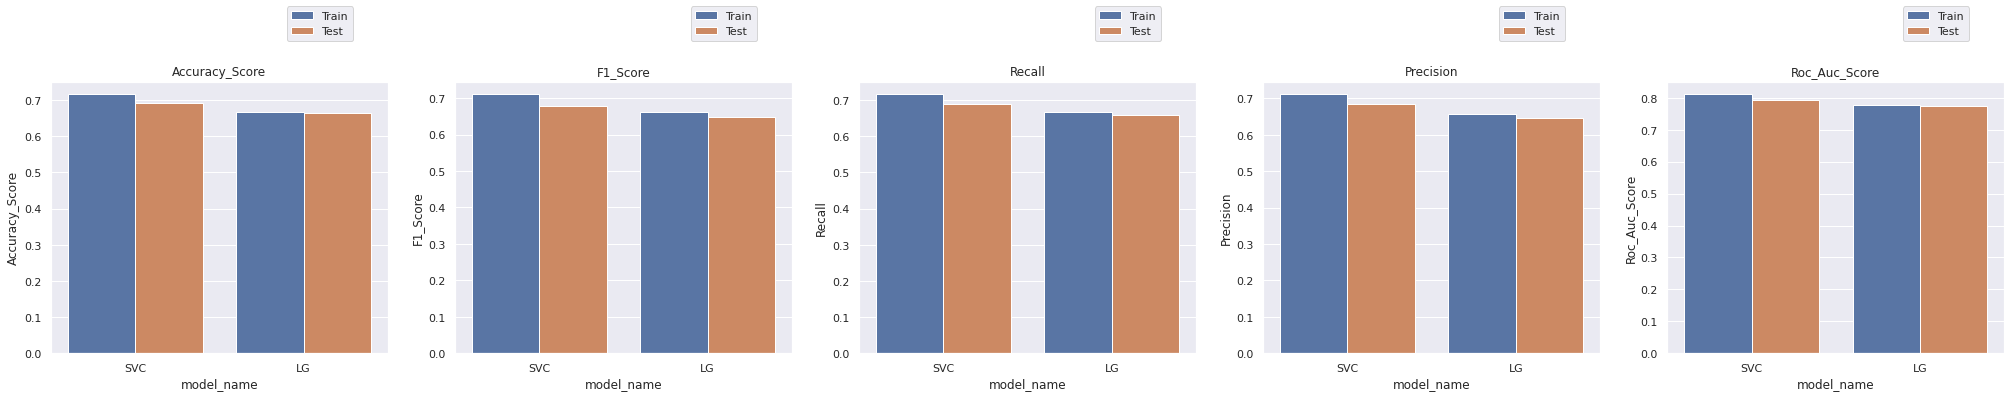

In [624]:
## Plot the scores of every method 
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(35,5))

model_plot_scores(model_total, 'Accuracy_Score'      , ax0)
model_plot_scores(model_total, 'F1_Score'            , ax1)
model_plot_scores(model_total, 'Recall'              , ax2)
model_plot_scores(model_total, 'Precision'           , ax3)
model_plot_scores(model_total, 'Roc_Auc_Score'       , ax4)

####As we can see from the previous metrics also visuals for dataset 2009-2016:
For both train and test datasets, the scores are very close with a better perfomance for SVC method

-------------------------------------------------------------------------------
## To continue with, lets fit to model as test the data from athens_2017.dat

In [625]:
test_b_17        = df_17.drop(columns=['month','season'])
test_b_17_season = df_17['season']

###Support Vector Machine

,model_name,type,metric_name,metric
0,SVC,Test_2017,Accuracy_Score,0.6712
1,SVC,Test_2017,F1_Score,0.6599
2,SVC,Test_2017,Recall,0.6715
3,SVC,Test_2017,Precision,0.6582
4,SVC,Test_2017,Roc_Auc_Score,0.7810




Confusion matrix : 
 [[0.87777778 0.08888889 0.         0.03333333]
 [0.17391304 0.65217391 0.02173913 0.15217391]
 [0.         0.0326087  0.79347826 0.17391304]
 [0.16483516 0.2967033  0.17582418 0.36263736]]


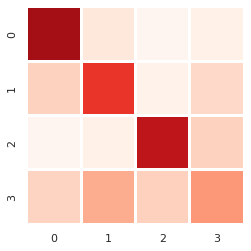

In [626]:
test_pred_SVC_2017  = model_prediction(SVC_model, test_b_17)

#Support Vector Evaluation
print("\n")
SVC_test_2017 = model_evaluation_classification(test_b_17_season, test_pred_SVC_2017,'SVC', 'Test_2017')
print("\n")
conf_matrix_classification(test_b_17_season, test_pred_SVC_2017,'Reds')

###Logistic Regression

,model_name,type,metric_name,metric
0,LG,Test_2017,Accuracy_Score,0.6384
1,LG,Test_2017,F1_Score,0.6292
2,LG,Test_2017,Recall,0.6386
3,LG,Test_2017,Precision,0.6259
4,LG,Test_2017,Roc_Auc_Score,0.7590




Confusion matrix : 
 [[0.84444444 0.1        0.         0.05555556]
 [0.19565217 0.58695652 0.01086957 0.20652174]
 [0.         0.0326087  0.79347826 0.17391304]
 [0.12087912 0.37362637 0.17582418 0.32967033]]


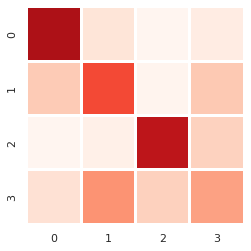

In [627]:
# Logistic Regression run 
test_pred_lr_2017  = model_prediction(lr_model, test_b_17)

# Logistic Regression Evaluation
print("\n")
LG_test_2017 = model_evaluation_classification(test_b_17_season, test_pred_lr_2017, 'LG', 'Test_2017')
print("\n")
conf_matrix_classification(test_b_17_season, test_pred_lr_2017,'Reds')

In [628]:
## merge the results in order to compare them
model_total  = []
model_total  = pd.concat([  
                            SVC_test_2017 ,
                            LG_test_2017 
                          ])

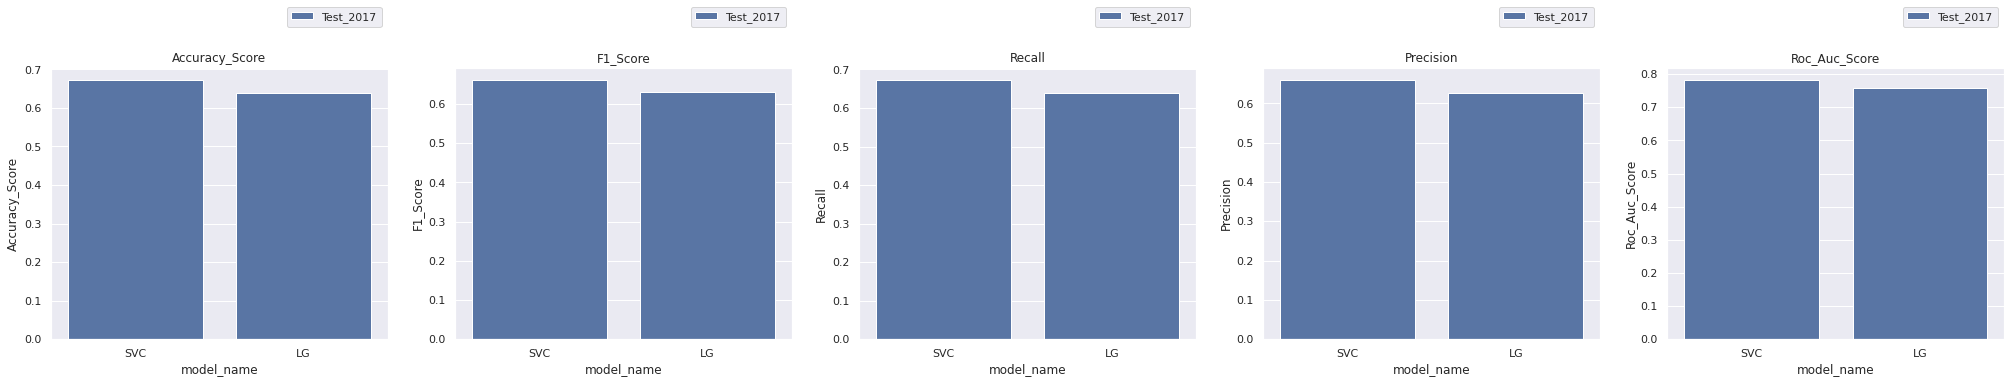

In [629]:
## Plot the scores of every method 
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(35,5))

model_plot_scores(model_total, 'Accuracy_Score'      , ax0)
model_plot_scores(model_total, 'F1_Score'            , ax1)
model_plot_scores(model_total, 'Recall'              , ax2)
model_plot_scores(model_total, 'Precision'           , ax3)
model_plot_scores(model_total, 'Roc_Auc_Score'       , ax4)

As we can see from the previous metrics also visuals for dataset 2017 :<br>
For both methods (SVC and Logistic regration), we have similar scores like we had for test dataset of 2009-2016. <br> Also SVC method is a little better for 2017